In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=46faaecabc7cf74bda06cd0541c09c08fb884b5912c165481a143d18eb7204b7
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
behavior_complexity = ctrl.Antecedent(np.arange(0, 11, 1), 'behavior_complexity')
human_interaction_effectiveness = ctrl.Antecedent(np.arange(0, 11, 1), 'human_interaction_effectiveness')
learning_adaptation = ctrl.Antecedent(np.arange(0, 11, 1), 'learning_adaptation')

In [5]:
sentience_level = ctrl.Consequent(np.arange(0, 101, 1), 'sentience_level')

In [6]:
behavior_complexity['low'] = fuzz.trimf(behavior_complexity.universe, [0, 0, 5])
behavior_complexity['medium'] = fuzz.trimf(behavior_complexity.universe, [0, 5, 10])
behavior_complexity['high'] = fuzz.trimf(behavior_complexity.universe, [5, 10, 10])

human_interaction_effectiveness['low'] = fuzz.trimf(human_interaction_effectiveness.universe, [0, 0, 5])
human_interaction_effectiveness['medium'] = fuzz.trimf(human_interaction_effectiveness.universe, [0, 5, 10])
human_interaction_effectiveness['high'] = fuzz.trimf(human_interaction_effectiveness.universe, [5, 10, 10])

learning_adaptation['low'] = fuzz.trimf(learning_adaptation.universe, [0, 0, 5])
learning_adaptation['medium'] = fuzz.trimf(learning_adaptation.universe, [0, 5, 10])
learning_adaptation['high'] = fuzz.trimf(learning_adaptation.universe, [5, 10, 10])

sentience_level['low'] = fuzz.trimf(sentience_level.universe, [0, 0, 50])
sentience_level['medium'] = fuzz.trimf(sentience_level.universe, [30, 50, 70])
sentience_level['high'] = fuzz.trimf(sentience_level.universe, [60, 100, 100])

In [14]:
rule1 = ctrl.Rule(behavior_complexity['low'] & human_interaction_effectiveness['low'] & learning_adaptation['low'], sentience_level['low'])
rule2 = ctrl.Rule(behavior_complexity['low'] & human_interaction_effectiveness['medium'] & learning_adaptation['medium'], sentience_level['low'])
rule3 = ctrl.Rule(behavior_complexity['low'] & human_interaction_effectiveness['high'] & learning_adaptation['high'], sentience_level['medium'])
rule4 = ctrl.Rule(behavior_complexity['medium'] & human_interaction_effectiveness['low'] & learning_adaptation['low'], sentience_level['medium'])
rule5 = ctrl.Rule(behavior_complexity['medium'] & human_interaction_effectiveness['medium'] & learning_adaptation['medium'], sentience_level['medium'])
rule6 = ctrl.Rule(behavior_complexity['medium'] & human_interaction_effectiveness['high'] & learning_adaptation['high'], sentience_level['high'])
rule7 = ctrl.Rule(behavior_complexity['high'] & human_interaction_effectiveness['low'] & learning_adaptation['low'], sentience_level['medium'])
rule8 = ctrl.Rule(behavior_complexity['high'] & human_interaction_effectiveness['medium'] & learning_adaptation['medium'], sentience_level['high'])
rule9 = ctrl.Rule(behavior_complexity['high'] & human_interaction_effectiveness['high'] & learning_adaptation['high'], sentience_level['high'])
rule10 = ctrl.Rule(behavior_complexity['medium'] & human_interaction_effectiveness['high'] & learning_adaptation['low'], sentience_level['medium'])

In [15]:
sentience_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                     rule6, rule7, rule8, rule9, rule10])
sentience_simulation = ctrl.ControlSystemSimulation(sentience_ctrl)

In [16]:
sentience_simulation.input['behavior_complexity'] = 8
sentience_simulation.input['human_interaction_effectiveness'] = 6
sentience_simulation.input['learning_adaptation'] = 9

In [17]:
sentience_simulation.compute()

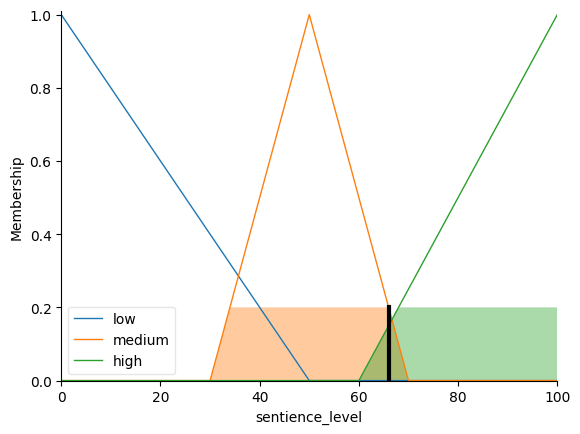

In [18]:
#behavior_complexity.view()
#human_interaction_effectiveness.view()
#learning_adaptation.view()
sentience_level.view(sim=sentience_simulation)